In [6]:
# raw copy-paste from the paper (https://arxiv.org/pdf/2204.07705.pdf) Table 5
eval_tasks_dump = "evaluation_tasks.txt"
eval_tasks_txt = open(eval_tasks_dump).readlines()[0]
eval_tasks = [task_id for task_id in eval_tasks_txt.split() if task_id.startswith("task")]
eval_tasks[:5]

['task937_defeasible_nli_atomic_textual_entailment',
 'task202_multinli_textual_entailment',
 'task936_defeasible_nli_atomic_textual_entailment',
 'task641_e_snli_textual_entailment',
 'task1344_rte_textual_entailment']

In [39]:
# run this in the clone of natural-instructions

import os
import json

ignored_keys = ["Instances"]

root_dir = "tasks"
all_files = os.listdir(root_dir)
all_tasks_files = [f for f in all_files if f.endswith("json")]

tasks_metadata = {}
for f in all_tasks_files:
    with open(os.path.join(root_dir, f)) as f_obj:
        json_dict = json.load(f_obj)
        tasks_metadata[f.replace(".json", "")] = {k: v for k, v in json_dict.items() if k not in ignored_keys}

In [43]:
import pandas as pd

all_tasks = pd.DataFrame(tasks_metadata).T
all_tasks = all_tasks.applymap(lambda x: x[0] if x else None)

In [47]:
all_tasks["is_eval"] = [t.split("_")[0] in [eval_t.split("_")[0] for eval_t in eval_tasks] for t in all_tasks.index]

In [49]:
all_tasks.head()

,Contributors,Source,URL,Categories,Reasoning,Definition,Input_language,Output_language,Instruction_language,Domains,Positive Examples,Negative Examples,is_eval
task701_mmmlu_answer_generation_high_school_computer_science,Sujan Reddy A,measuring_massive_multitask_language_understan...,https://github.com/hendrycks/test,Question Answering,Logical Reasoning,You are given a question on high school comput...,English,English,English,Computer Science,{'input': 'Let x = 1. What is x << 3 in Python...,{'input': 'Let x = 1. What is x << 3 in Python...,False
task266_paper_reviews_reviewer_perspective_classification,Mihir Parmar,paper_reviews_data_set,https://archive.ics.uci.edu/ml/datasets/Paper+...,Sentiment Analysis,None,You are given a paper review either in Spanish...,Spanish,English,English,Conference,{'input': 'El artículo presenta un interesante...,{'input': 'Unless there is a strong info sci a...,False
task1659_title_generation,Ayush Rawat,billsum,https://huggingface.co/datasets/billsum,Title Generation,None,"In this task, you are given a summary for US C...",English,English,English,Government and Politics,{'input': 'Amends the Water Resources Developm...,{'input': 'Federal Forage Fee Act of 1993 - Su...,True
task1244_ted_translation_gl_pl,David Stap,multilingual_ted,https://github.com/neulab/word-embeddings-for-nmt,Translation,None,You are given a sentence in Galician. Your job...,Galician,Polish,English,TED Talks,"{'input': 'Hoxe, en Suecia e outros países ric...","{'input': 'E agora, “brrrrrrrrr ”, coma se fos...",False
task941_copa_gu_commonsense_cause_effect,Tanay Dixit,indicnlp,https://indicnlp.ai4bharat.org/papers/arxiv202...,Cause Effect Classification,Commonsense Reasoning,In this task you're given two statements in Gu...,Gujarati,English,English,Commonsense -> Concepts and Relations,{'input': 'સર્ફરે મોજાને પકડ્યો. તરંગ તેને ક...,{'input': 'અમે પિઝા મંગાવી. પીત્ઝા પહોંચાડી ...,True


In [59]:
all_tasks.Domains.nunique()

108

In [136]:
eval_domains = all_tasks[all_tasks["is_eval"]]["Domains"].unique()
len(eval_domains)

36

In [251]:
all_tasks_counts = all_tasks["Domains"].unique()

train_counts = all_tasks[(~all_tasks["is_eval"])]["Domains"].value_counts()
eval_counts = all_tasks[(all_tasks["is_eval"])]["Domains"].value_counts()

for task in all_tasks_counts:
    if task not in train_counts:
        train_counts[task] = 0
    if task not in eval_counts:
        eval_counts[task] = 0

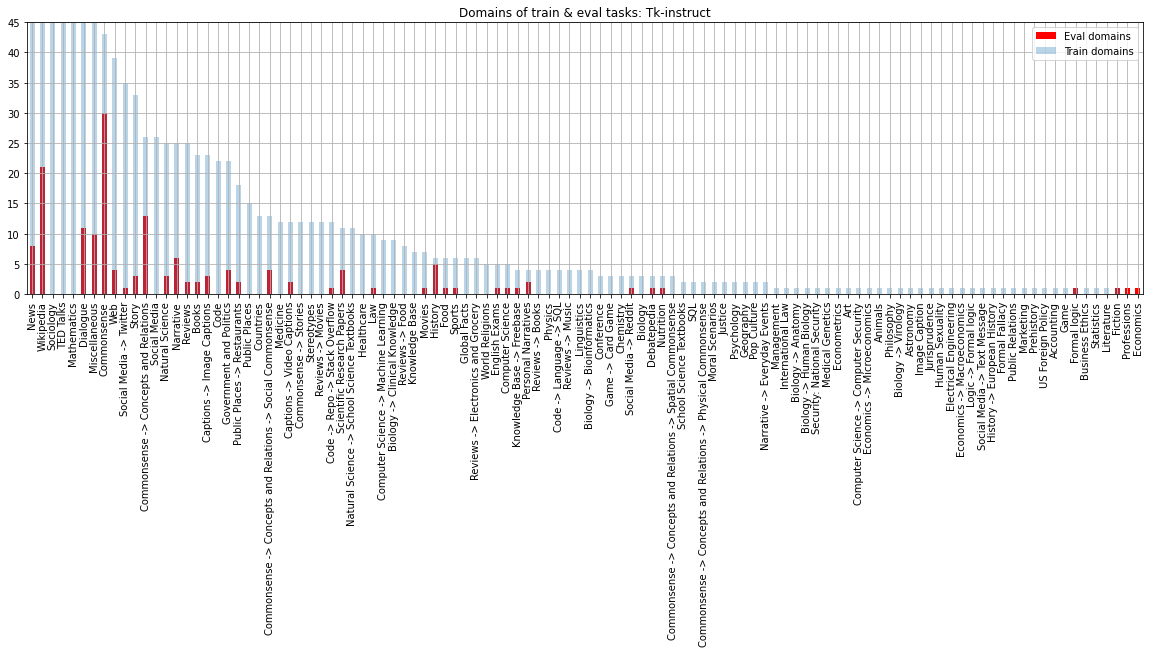

In [255]:
idx = train_counts.sort_values(ascending=False).index

eval_counts[idx].plot.bar(figsize=(20, 5), grid=True, color="r")
train_counts[idx].plot.bar(figsize=(20, 5), alpha=0.3, ylim=(0,45), grid=True)

plt.title("Domains of train & eval tasks: Tk-instruct")
plt.legend(["Eval domains", "Train domains"])

# plt.tight_layout()
plt.savefig("per_domain_distribution_NI.png", format="png", dpi=300)

In [248]:
all_tasks_counts = all_tasks["Categories"].unique()

train_counts = all_tasks[(~all_tasks["is_eval"])]["Categories"].value_counts()
eval_counts = all_tasks[(all_tasks["is_eval"])]["Categories"].value_counts()

for task in all_tasks_counts:
    if task not in train_counts:
        train_counts[task] = 0
    if task not in eval_counts:
        eval_counts[task] = 0

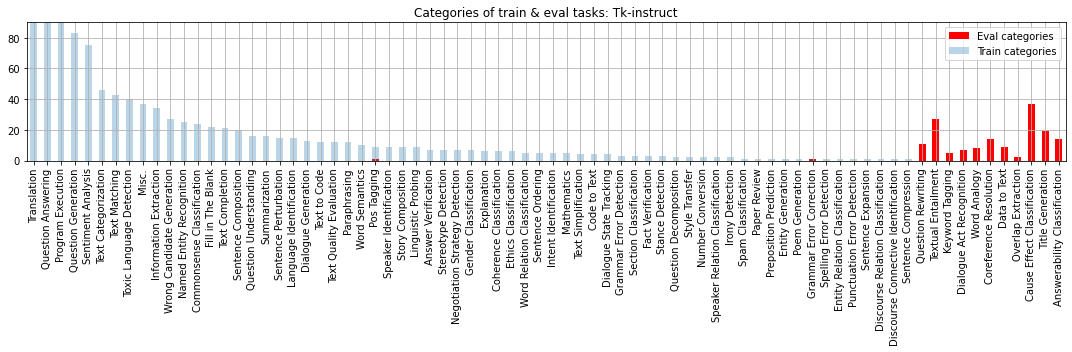

In [249]:
idx = train_counts.sort_values(ascending=False).index

eval_counts[idx].plot.bar(color="r")
train_counts[idx].plot.bar(figsize=(15, 5), alpha=0.3, ylim=(0,90), grid=True)

plt.title("Categories of train & eval tasks: Tk-instruct")
plt.legend(["Eval categories", "Train categories"])
plt.tight_layout()
plt.savefig("per_category_distribution_NI.png", format="png", dpi=300)

In [257]:
eval_counts.sum()

155